# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (1.5 puntos)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si una paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [3]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

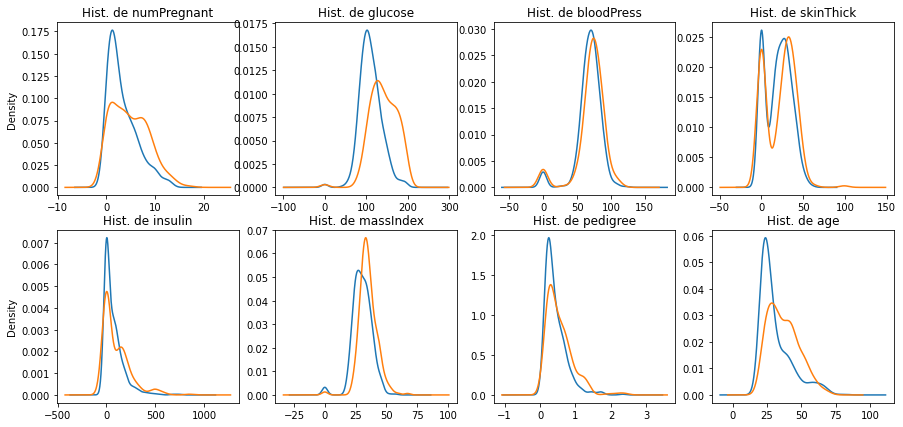

In [5]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [42]:
clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
#print("scores: ", scores)
print("Score global del modelo árbol de decisión: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo árbol de decisión: 0.73 +/- 0.01


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

In [40]:
#Modelo de K Neighbors

for i in range (20):
    clf3 = KNeighborsClassifier(n_neighbors=i+1)
    scores3 = cross_val_score(clf3, X, y, cv=5)
    print("Score global del modelo K Neighbors: {:.2f} +/- {:.2f} con {:d} vecinos".format(scores3.mean(), scores3.std(), i+1))

Score global del modelo K Neighbors: 0.66 +/- 0.05 con 1 vecinos
Score global del modelo K Neighbors: 0.69 +/- 0.02 con 2 vecinos
Score global del modelo K Neighbors: 0.71 +/- 0.03 con 3 vecinos
Score global del modelo K Neighbors: 0.72 +/- 0.01 con 4 vecinos
Score global del modelo K Neighbors: 0.72 +/- 0.02 con 5 vecinos
Score global del modelo K Neighbors: 0.73 +/- 0.02 con 6 vecinos
Score global del modelo K Neighbors: 0.74 +/- 0.02 con 7 vecinos
Score global del modelo K Neighbors: 0.75 +/- 0.02 con 8 vecinos
Score global del modelo K Neighbors: 0.74 +/- 0.03 con 9 vecinos
Score global del modelo K Neighbors: 0.74 +/- 0.03 con 10 vecinos
Score global del modelo K Neighbors: 0.75 +/- 0.03 con 11 vecinos
Score global del modelo K Neighbors: 0.75 +/- 0.03 con 12 vecinos
Score global del modelo K Neighbors: 0.76 +/- 0.04 con 13 vecinos
Score global del modelo K Neighbors: 0.76 +/- 0.03 con 14 vecinos
Score global del modelo K Neighbors: 0.74 +/- 0.04 con 15 vecinos
Score global del mo

Hemos impreso la salida para 20 vecinos y así poder comparar, llegamos a hacer una impresion de hasta 40 pero no se observaban grandes cambio y el mayor score ya se alcanzaba habiendo generado los primeros 20 vecinos.

El mayor score es 0.76 que se alcanza tanto con 13 como con los 14 vecinos más cercanos, pero con 14 obtenemos una menor desviación.


In [59]:
#Modelo de arbol de decisión

for i in range (8):
    clf1 = DecisionTreeClassifier(max_depth=i+1)
    scores1 = cross_val_score(clf1, X, y, cv=5)
    #print("scores: ", scores)
    print("Score global del modelo árbol de decisión: {:.2f} +/- {:.2f} con profundidad {:d}".format(scores1.mean(), scores1.std(), i+1))

Score global del modelo árbol de decisión: 0.72 +/- 0.03 con profundidad 1
Score global del modelo árbol de decisión: 0.74 +/- 0.01 con profundidad 2
Score global del modelo árbol de decisión: 0.73 +/- 0.01 con profundidad 3
Score global del modelo árbol de decisión: 0.73 +/- 0.03 con profundidad 4
Score global del modelo árbol de decisión: 0.75 +/- 0.04 con profundidad 5
Score global del modelo árbol de decisión: 0.72 +/- 0.04 con profundidad 6
Score global del modelo árbol de decisión: 0.74 +/- 0.03 con profundidad 7
Score global del modelo árbol de decisión: 0.71 +/- 0.02 con profundidad 8


El mejor score obtenido tras probar para profundidades de 1 a 8 ha sido 0.75 a profundidad 5.

In [62]:
#Modelo de red nuronal
for i in range(10, 120, 5):
    clf5 = MLPClassifier(hidden_layer_sizes=(i,), max_iter=1000, alpha=0)
    scores5 = cross_val_score(clf5, X, y, cv=5)
    print("Score global del modelo de red nuronal: {:.2f} +/- {:.2f} con {:d} neuronas en la primera capa".format(scores5.mean(), scores5.std(), i))

Score global del modelo de red nuronal: 0.69 +/- 0.02 con 10 neuronas en la primera capa
Score global del modelo de red nuronal: 0.67 +/- 0.03 con 15 neuronas en la primera capa
Score global del modelo de red nuronal: 0.68 +/- 0.02 con 20 neuronas en la primera capa
Score global del modelo de red nuronal: 0.68 +/- 0.02 con 25 neuronas en la primera capa
Score global del modelo de red nuronal: 0.67 +/- 0.03 con 30 neuronas en la primera capa
Score global del modelo de red nuronal: 0.68 +/- 0.06 con 35 neuronas en la primera capa
Score global del modelo de red nuronal: 0.68 +/- 0.01 con 40 neuronas en la primera capa
Score global del modelo de red nuronal: 0.70 +/- 0.02 con 45 neuronas en la primera capa
Score global del modelo de red nuronal: 0.68 +/- 0.02 con 50 neuronas en la primera capa
Score global del modelo de red nuronal: 0.67 +/- 0.02 con 55 neuronas en la primera capa
Score global del modelo de red nuronal: 0.67 +/- 0.04 con 60 neuronas en la primera capa
Score global del mode

Para hacer la comparación y ver con que parametros obtenemos los mejores resultados comenzamos en 10 neurons y probamos hasta 120 con un paso de 5. Usamos solo una capa para hacer las puebas, pues como hemos visto en teoría con una sola capa el modelo de red neuronal va a funcionar correctamente para este tipo de ejercicios.

Tras ejecutar el bucle varias veces y obtener distintos resultados en cada iteración podemos concluir que los mejores scores se obtienen entorno a las 50 capas donde el mejor score ronda los 0.70.